<a href="https://colab.research.google.com/github/CrazyAncestor/Data-Analysis-in-Astronomy-2021/blob/main/PCA_Photo_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

這個筆記本提供載入和儲存外部來源資料的方法。

# 本機檔案系統

## 從本機檔案系統上傳檔案

<code>files.upload</code> 會傳回已上傳檔案的字典。
字典會使用檔案名稱做為索引鍵，值則是上傳的資料。

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## 將檔案下載至本機檔案系統

<code>files.download</code> 會透過瀏覽器下載檔案至本機電腦。


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

# Google 雲端硬碟

你可透過多種方式存取雲端硬碟中的檔案，包括：
- 在執行階段的虛擬機器中掛接 Google 雲端硬碟
- 在 <a href="https://pythonhosted.org/PyDrive/">PyDrive</a> 等 API 前後使用包裝函式
- 使用<a href="https://developers.google.com/drive/v3/web/about-sdk">原生 REST API</a>



個別範例位於下方。

## 在本機環境掛接 Google 雲端硬碟

下列範例會顯示如何在執行階段使用授權碼掛接 Google 雲端硬碟，並在硬碟上寫入和讀取檔案。執行之後，你會在 <a href="https://drive.google.com/">https://drive.google.com/</a> 看到新檔案 &#40;<code>foo.txt</code>&#41;。

此功能僅支援讀取、寫入及移動檔案；如要透過程式修改共用設定或其他中繼資料，請使用下列任一選項。

<strong>注意：</strong>在檔案瀏覽器中使用「掛接雲端硬碟」按鈕時，僅由目前使用者編輯的筆記本不需要驗證碼。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.decomposition import PCA

In [2]:
import numpy as np
data = np.load('/content/drive/My Drive/test_rand10000_objects.npz')


In [6]:
N_test = 10000
files_dir = "/content/drive/My Drive"
datafilename = files_dir  + '/' + 'test_rand10000_objects.npz'
training = np.load(datafilename)

In [7]:
X_train = training['R_band_resize']
x_train = []
for i in range(len(X_train)):
    x_train.append(X_train[i].reshape(72*72))

In [8]:
pca = PCA(30)
pca.fit(x_train)
coeff = pca.transform(x_train)

Text(0, 0.5, 'Coeff 1')

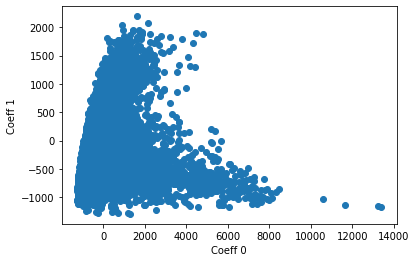

In [10]:
plt.scatter(coeff[:,0],coeff[:,1])

plt.xlabel('Coeff 0')
plt.ylabel('Coeff 1')

In [78]:
data_catalog = pf.open('/content/drive/My Drive/catalog_rand10000.fits')

In [79]:

id = data_catalog[1].data['ObjectID']
redshift = data_catalog[1].data['z_spec']


In [80]:
print(redshift)

[0.1950547  0.2499377  0.08071315 ... 0.08167217 0.104314   0.1477485 ]


In [81]:
f = open('/content/drive/My Drive/id_rand_10000_obj.txt','r')
from locale import atoi
lines = f.readlines()
id_rand_10000 = []
for i in range(len(lines)):
  line = lines[i]
  id_rand_10000.append(atoi(line))
print(id_rand_10000)

[42291890128711179, 41126708450975110, 41755753656091781, 44341671860652473, 41170972383925095, 37489528281261679, 38553838357073648, 41628227487163441, 41179871556160300, 37484967025971057, 40633839478916269, 43184727930196127, 41654882054201881, 69621767760523300, 37485100169974067, 41760430875504058, 41218650815881078, 41733342516768711, 40669582196759630, 70364354721106581, 40691293256439862, 41737469980328093, 42283652381440688, 42168766301231543, 43211240763319782, 41122572397470839, 38549564864619129, 42160236496181434, 74649014095584522, 42252196040956881, 41623404238888422, 42687581170701344, 43159009666038149, 42314430117077510, 38553438925123463, 43158309586356857, 44232274748661655, 42046454222578067, 37489373662436690, 41179751297081016, 37485117349826990, 43216330299566912, 41183999019734362, 41645115298566403, 41558133620883011, 42692936994943399, 40985975257590137, 42032976615203715, 40981693175192009, 42028428244831126, 70347046002902792, 44795233292010761, 41011809485

In [86]:
def get_z(id_input,id_list,z_list):
  a = np.where(id_list == id_input)[0]
  return z_list[a][0]
z_rand_10000 = []
for i in range(10000):
  z_rand_10000.append(get_z(id_rand_10000[i],id,redshift))

In [84]:
print(z_rand_10000)

[0.13091, 0.17218, 0.13732961, 0.082427, 0.190061, 0.35346434, 0.28716418, 0.06659416, 0.3553355, 0.30392835, 0.04804016, 0.3892602, 0.05952586, 0.3515138, 0.28619, 0.28373834, 0.07331129, 0.2674055, 0.3909721, 0.2938501, 0.07926861, 0.02018612, 0.21326, 0.1558, 0.07508408, 0.07516389, 0.15386446, 0.06685431, 0.3149124, 0.2428686, 0.2145459, 0.32640463, 0.345824, 0.3766631, 0.170576, 0.3647364, 0.1632156, 0.2009819, 0.10005898, 0.2390855, 0.3333, 0.080235, 0.2620958, 0.07954336, 0.36263, 0.32637656, 0.15196, 0.15587, 0.16136, 0.3536683, 0.1019525, 0.1576348, 0.036578, 0.1004022, 0.1738549, 0.24484968, 0.13633, 0.10905, 0.2140845, 0.2532044, 0.07032876, 0.12587039, 0.1364786, 0.05677128, 0.21301, 0.3771558, 0.09412802, 0.1016744, 0.02419674, 0.1482134, 0.1793382, 0.11893, 0.25776, 0.13532, 0.07251659, 0.1890997, 0.18618, 0.21333878, 0.0462, 0.09947513, 0.134644, 0.04675757, 0.19510704, 0.2121368, 0.3834601, 0.047, 0.24330935, 0.23172, 0.3362357, 0.3961442, 0.09758288, 0.35630065, 0.2324

In [87]:
np.savez('rand_10000_obj.npz',ObjectID = id_rand_10000,z_spec = z_rand_10000)

In [89]:
photo_z = np.load('rand_10000_obj.npz')['z_spec']

In [90]:
import sklearn.linear_model as sl
import sklearn.metrics as sm
import sklearn.svm as ss

In [100]:
y_train = np.array(photo_z)*10
y_train = y_train.astype(int)
print(len(y_train))
print(coeff[:,0])
lr = sl.LogisticRegression(max_iter=1000000)
lr.fit(coeff[:,:2],y_train)
number_pred = lr.predict(coeff[:,:2])


10000
[ -283.59471332 -1028.38903132  1660.53660203 ...  -669.63191748
   718.40590323  -460.28200723]


In [101]:
print(len(number_pred))
print(y_train)

10000
[1 1 1 ... 3 3 2]


In [102]:
print('Accuracy_score')
print(sm.accuracy_score(y_train,number_pred))

Accuracy_score
0.3737
